**Laporan Proyek Prediksi Diabetes Menggunakan Machine Learning**

**Nama: Elisa Ramadanti**

# **Domain Proyek**

Diabetes merupakan salah satu penyakit kronis yang banyak diderita masyarakat di seluruh dunia. Menurut [WHO](https://www.who.int/news-room/fact-sheets/detail/diabetes), prevalensi diabetes terus meningkat secara global, menjadikannya masalah kesehatan yang mendesak. Deteksi dini terhadap risiko diabetes sangat penting untuk mencegah komplikasi yang lebih serius, seperti penyakit jantung, stroke, dan kerusakan organ lainnya.

**Prediksi diabetes secara akurat dapat membantu dalam:**
- Deteksi dini risiko diabetes.
- Pencegahan komplikasi yang lebih serius.
- Membantu tenaga medis dalam pengambilan keputusan yang lebih baik.

**Tujuan utama:**  
Mengembangkan model machine learning yang mampu memprediksi risiko diabetes secara akurat berdasarkan data kesehatan individu.

# **Business Understanding**

**Problem Statements**

*   Bagaimana mengidentifikasi individu dengan risiko diabetes menggunakan data kesehatan?
*   Bagaimana meningkatkan akurasi prediksi diabetes menggunakan model machine learning yang tepat?

**Goals**

*  Membuat model machine learning yang mampu memprediksi risiko diabetes dengan akurasi tinggi.
*  Menentukan algoritma terbaik melalui evaluasi model menggunakan beberapa metrik evaluasi.

### **Solution statements**

*  Menggunakan beberapa algoritma klasifikasi, terutama algoritma ensemble seperti **XGBoost**, **LightGBM**, dan **CatBoost**
*  Menerapkan **hyperparameter tuning** menggunakan GridSearchCV untuk mengoptimalkan performa model.

# **Data Understanding**

Dataset yang digunakan adalah **Diabetes Prediction** yang diperoleh dari *Kaggle*. Dataset ini bertujuan untuk memprediksi diabetes berdasarkan faktor risiko yang relevan.

1. **Jumlah Data:**  memiliki **1000 baris dengan 9 Kolom** sebagai berikut:  

2. **Kondisi Data:**
  - Dataset ini memiliki ketidakseimbangan kelas pada kolom Diagnosis, dengan jumlah label "1" (diabetes) dan "0" (tidak diabetes) yang tidak merata. Sehingga Ini perlu diperhatikan untuk menghindari bias pada model prediksi yang akan dibangun.
  - Missing Values: Memeriksa dan memastikan tidak ada nilai yang hilang (missing values).
  - Duplikat: Memeriksa duplikasi dan memastikan tidak ada data yang berulang.
  - Terdapat outlier pada beberapa fitur, yang akan ditangani menggunakan metode IQR.

3. **Sumber Data:** Dataset ini diambil dari [Kaggle - Diabetes Prediction](https://www.kaggle.com/datasets/mrsimple07/diabetes-prediction/data).

4. **Uraian Fitur:**
  - **Pregnancies**: Jumlah kehamilan  
  - **Glucose**: Kadar glukosa dalam darah  
  - **BloodPressure**: Tekanan darah  
  - **SkinThickness**: Ketebalan lipatan kulit  
  - **Insulin**: Kadar insulin  
  - **BMI**: Indeks massa tubuh  
  - **DiabetesPedigreeFunction**: Fungsi silsilah diabetes (mengindikasikan riwayat keluarga)  
  - **Age**: Usia  
  - **Diagnosis**: Label klasifikasi dengan nilai:  
    - **0** = Tidak Diabetes  
    - **1** = Diabetes  
    
5. **Tipe Data:**  
   - Semua fitur numerik memiliki tipe data `float64` atau `int64`.  
   - Tidak ada fitur kategorikal yang memerlukan encoding.

6. **Eksplorasi Data:**  beberapa teknik visualisasi dan analisis eksploratori data akan dilakukan. Misalnya:

  - Distribusi Data: Visualisasi distribusi nilai untuk setiap fitur seperti BMI, Glucose, dan Age untuk memahami sebaran data.
  - Korelasi: Melakukan analisis korelasi antar fitur untuk melihat hubungan yang mungkin ada antar fitur, terutama dengan target label Diagnosis.
  - Imbalance Handling: Menganalisis ketidakseimbangan kelas dalam Diagnosis dan menerapkan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani masalah tersebut.

## **Import Library**

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [2]:
# Import Library
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### **Download Dataset**

In [3]:
#Dataset ini diambil dari Kaggle menggunakan kode berikut:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrsimple07/diabetes-prediction")

print("Path to dataset files:", path)

100%|██████████| 64.2k/64.2k [00:00<00:00, 16.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/diabetes-prediction/versions/1


In [4]:
# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/mrsimple07/diabetes-prediction/versions/1"

# Check the contents of the directory to find the actual filename
print("Files in dataset directory:")
for filename in os.listdir(path):
    print(filename)

Files in dataset directory:
Diabetes_prediction.csv


## **Data Loading**

In [5]:
# Load Dataset
filename = 'Diabetes_prediction.csv'
df = pd.read_csv(os.path.join(path, filename))
df.head()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0

## **Assessing Data**

proses ini bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas

**Memeriksa tipe data data dari tiap kolom dengan info()**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


**Insight:**
- **Jumlah Data dan Fitur:** Dataset memiliki 1000 entri dan 9 fitur, cukup untuk klasifikasi dengan machine learning.  
- **Tidak Ada Missing Values:** Semua kolom memiliki 1000 non-null values, tetapi perlu dicek nilai ekstrem yang tidak valid.  
- **Tipe Data:** Terdapat 7 fitur numerik float64 dan 2 fitur int64, sehingga perlu normalisasi atau standardisasi.  
- **Fitur Target (Diagnosis):** Bertipe int64 dan kemungkinan label biner (0 = Tidak Diabetes, 1 = Diabetes). Perlu cek distribusi kelas untuk memastikan data tidak imbalance.  

**Menampilkan jumlah missing values yang terdapat dalam setiap kolom data**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

**Insight:**

Tidak ditemukan nilai yang hilang pada dataset ini

**Memeriksa duplikasi data**

In [8]:
df.duplicated().sum()

0

**Insight:**

Tidak ditemukan data duplikat pada dataset

**menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik dengan fungsi describe()**

In [9]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.000000    1000.000000    1000.000000  1000.000000   
mean      1.771000    99.440607      72.179837      23.278316    84.582679   
std       1.354398    19.470730      13.882017       1.173807    74.872733   
min       0.000000    30.571402      31.401487      19.369987  -165.310033   
25%       1.000000    86.145927      62.795447      22.501591    35.076535   
50%       2.000000    99.458362      71.909588      23.275225    84.442232   
75%       3.000000   113.264556      82.082660      24.052022   134.267842   
max       8.000000   161.238939     110.723715      26.917654   317.701852   

               BMI  DiabetesPedigreeFunction          Age   Diagnosis  
count  1000.000000               1000.000000  1000.000000  1000.00000  
mean     25.433600                  0.449383    43.281798     0.30600  
std       3.690223                  0.199334    14.465398     0.46106  
min      13.548818                  0.100037    -0.979804     0.00000  
25%      23.022715                  0.283376    33.518451     0.00000  
50%      25.455649                  0.448219    43.634273     0.00000  
75%      27.972184                  0.619158    53.098446     1.00000  
max      36.324598                  0.799654    90.573782     1.00000

Insigh:

Berdasarkan ringkasan di atas menunjukan bahwa:
- **Pregnancies:** Rata-rata kehamilan adalah 1.77 kali dengan rentang 0 hingga 8. Ini menunjukkan mayoritas responden memiliki sedikit kehamilan.  
- **Glucose:** Rata-rata 99.44 dengan standar deviasi 19.47. Ada nilai minimum 30.57 yang tidak masuk akal, sehingga perlu dicek kemungkinan data error.  
- **BloodPressure:** Rata-rata 72.18, tetapi ada nilai minimum 31.40 yang tidak logis, menunjukkan kemungkinan kesalahan pencatatan atau data kosong yang diisi dengan nol.  
- **SkinThickness:** Distribusi cenderung normal dengan rata-rata 23.28, namun rentang yang sempit (19.37 - 26.92) menunjukkan variabilitas yang rendah.  
- **Insulin:** Rata-rata 84.58 dengan standar deviasi yang tinggi (74.87), dan terdapat nilai negatif (-165.31) yang tidak mungkin. Perlu pembersihan data.  
- **BMI:** Rata-rata 25.43, menunjukkan populasi normal hingga overweight. Namun, nilai minimum 13.54 perlu diperiksa validitasnya.  
- **DiabetesPedigreeFunction:** Rata-rata 0.45 dengan distribusi yang wajar (0.10 - 0.80), menunjukkan faktor genetik dalam risiko diabetes.  
- **Age:** Rata-rata 43.28 tahun dengan rentang -0.98 hingga 90.57. Nilai negatif menunjukkan kesalahan data yang perlu dibersihkan.  
- **Diagnosis:** Kelas target biner dengan rata-rata 0.306, menunjukkan sekitar 30.6% populasi terdiagnosis diabetes, sehingga tidak ada ketidakseimbangan kelas yang ekstrem.  

## **Exploratory Data Analysis (EDA)**

Tahap ini akan Mengeksplorasi data dengan menampilkan visualisasi untuk mendapatkan insight yang mudah di pahami, meliputi:

- Distribusi Data: Visualisasi distribusi setiap fitur.
- Korelasi Antar Fitur: Menggunakan heatmap untuk melihat hubungan antar fitur.
- Distribusi Target (Diagnosis): Melihat keseimbangan kelas target.

**Melihat Distribusi Data Diagnosis**

In [64]:
# Distribusi Data pada Kolom Diagnosis
print("\nDistribusi Diagnosis:")
print(df['Diagnosis'].value_counts())


Distribusi Diagnosis:
Diagnosis
0    694
1    306
Name: count, dtype: int64


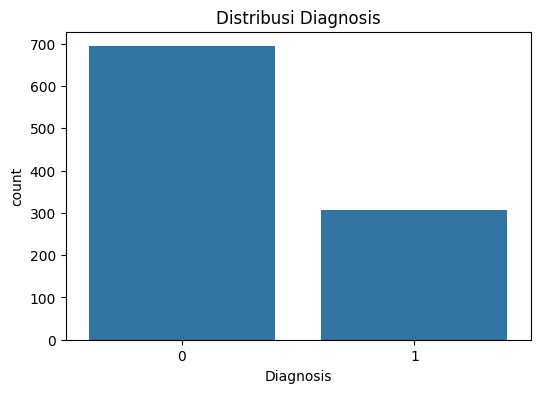

In [60]:
# Visualisasi Distribusi Data Diagnosis
plt.figure(figsize=(6,4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribusi Diagnosis')
plt.show()

**Insight:**

Terdapat ketidakseimbangan pada distribusi kelas Diagnosis, yang dapat mempengaruhi kinerja model klasifikasi.

**Melihat Rata-rata kolom Berdasarkan Diagnosis Diabetes**

In [67]:
df.groupby('Diagnosis').mean()

Pregnancies    Glucose  BloodPressure  SkinThickness    Insulin  \
Diagnosis                                                                    
0             1.769452  99.504846      72.088034      23.280208  82.971781   
1             1.767974  99.358849      72.396092      23.277491  88.408982   

                 BMI  DiabetesPedigreeFunction        Age  
Diagnosis                                                  
0          25.519146                  0.441372  43.708321  
1          25.251882                  0.467550  42.312125

**Melihat Distribusi Umur Berdasarkan Data Diagnosisi**

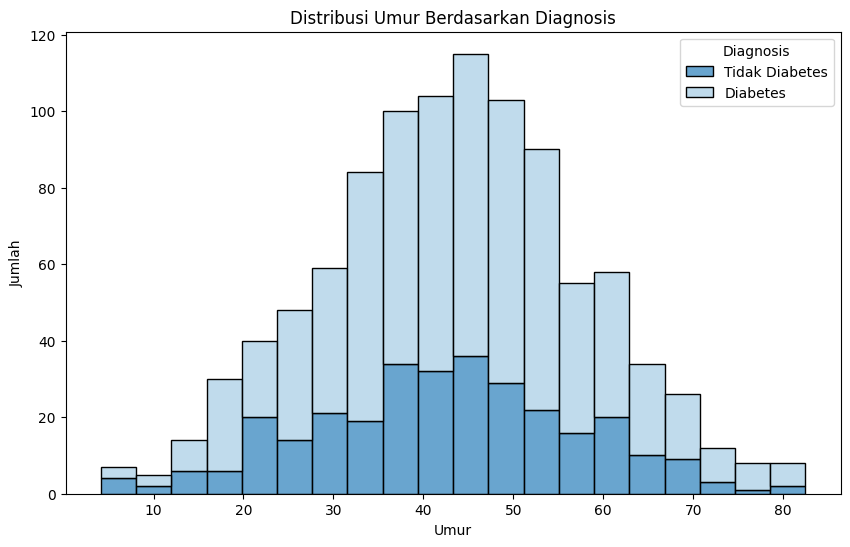

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Diagnosis', multiple='stack', bins=20, palette='Blues')
plt.title('Distribusi Umur Berdasarkan Diagnosis')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.legend(title='Diagnosis', labels=['Tidak Diabetes', 'Diabetes'])
plt.show()

**Melihat Distribusi Fitur Numerik**

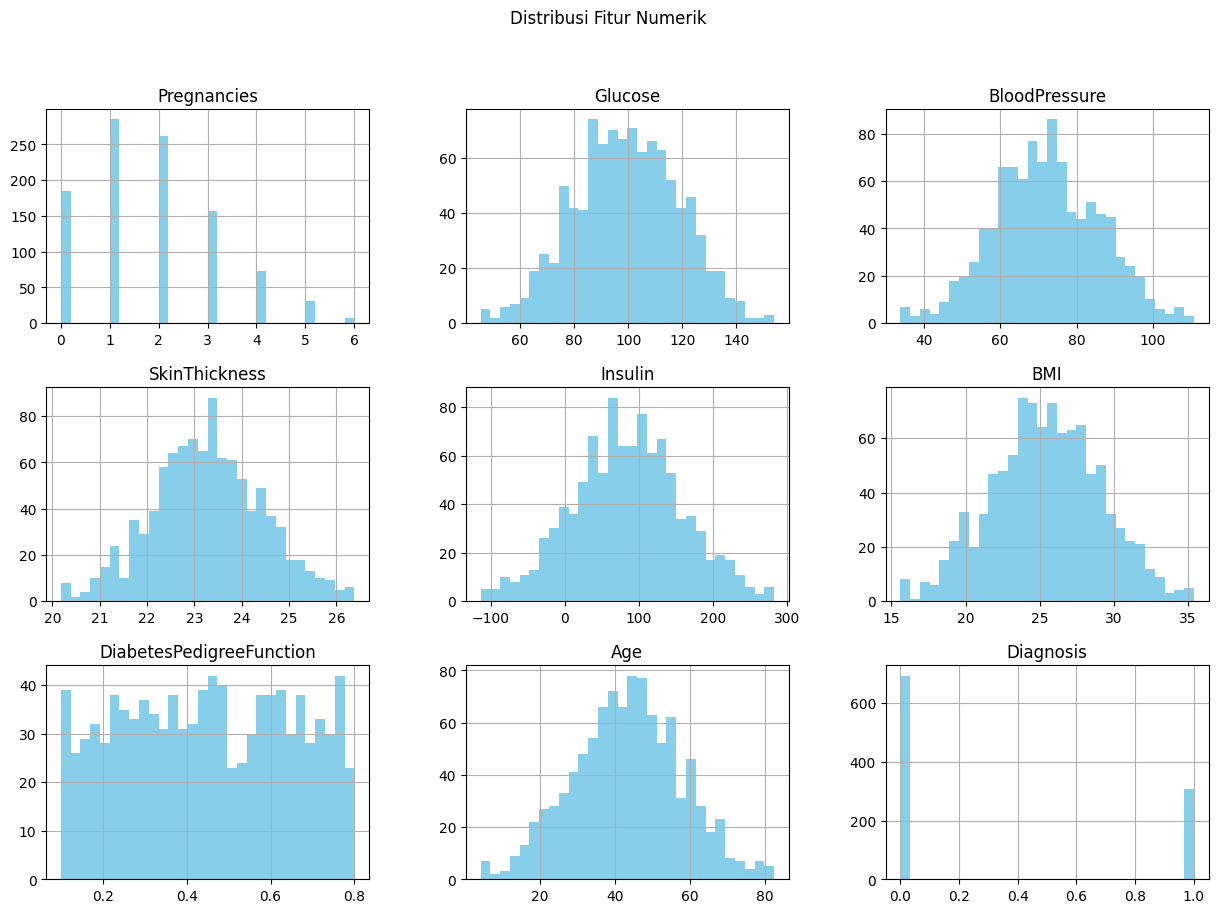

In [61]:
# Visualisasi Distribusi Setiap Fitur Numerik
df.hist(bins=30, figsize=(15,10), color='skyblue')
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

**Insight:**

Distribusi beberapa fitur menunjukkan adanya outlier dan ketidakwajaran pada nilai minimum.

**Melihat Korelasi Antar Fitur**

In [66]:
# Korelasi Antar Fitur
correlation = df.corr()
print("\nKorelasi Antar Fitur:")
correlation


Korelasi Antar Fitur:


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.011486       0.075852      -0.041220   
Glucose                      0.011486  1.000000       0.009457       0.001855   
BloodPressure                0.075852  0.009457       1.000000      -0.040483   
SkinThickness               -0.041220  0.001855      -0.040483       1.000000   
Insulin                     -0.018143 -0.011564       0.044952       0.043920   
BMI                         -0.005417  0.002195      -0.000545       0.063529   
DiabetesPedigreeFunction    -0.000369  0.004900      -0.007230      -0.056735   
Age                          0.085222 -0.003416       0.050179      -0.047600   
Diagnosis                   -0.000506 -0.003476       0.010237      -0.001076   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018143 -0.005417                 -0.000369   
Glucose                  -0.011564  0.002195                  0.004900   
BloodPressure             0.044952 -0.000545                 -0.007230   
SkinThickness             0.043920  0.063529                 -0.056735   
Insulin                   1.000000  0.047188                 -0.025978   
BMI                       0.047188  1.000000                 -0.021471   
DiabetesPedigreeFunction -0.025978 -0.021471                  1.000000   
Age                       0.037862 -0.064776                  0.017699   
Diagnosis                 0.033764 -0.033565                  0.060549   

                               Age  Diagnosis  
Pregnancies               0.085222  -0.000506  
Glucose                  -0.003416  -0.003476  
BloodPressure             0.050179   0.010237  
SkinThickness            -0.047600  -0.001076  
Insulin                   0.037862   0.033764  
BMI                      -0.064776  -0.033565  
DiabetesPedigreeFunction  0.017699   0.060549  
Age                       1.000000  -0.044742  
Diagnosis                -0.044742   1.000000

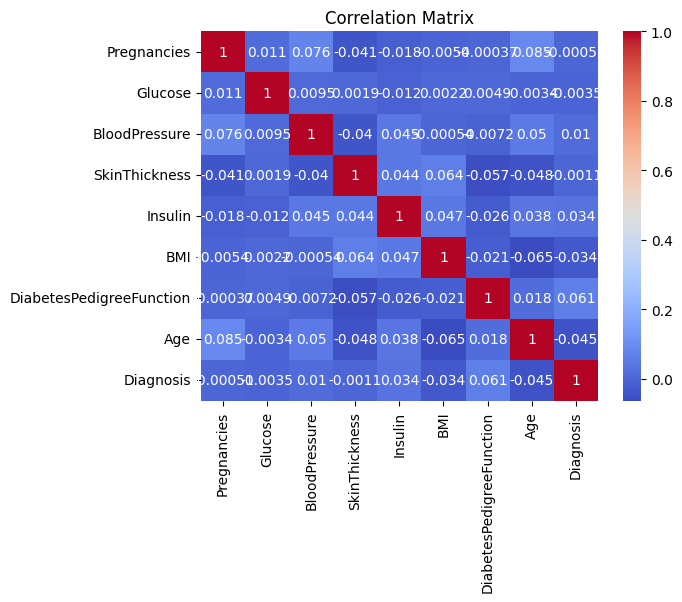

In [63]:
# Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Visualisasi Hubungan Antar Fitur dengan Pairplot Berdasarkan Diagnosis Diabetes**

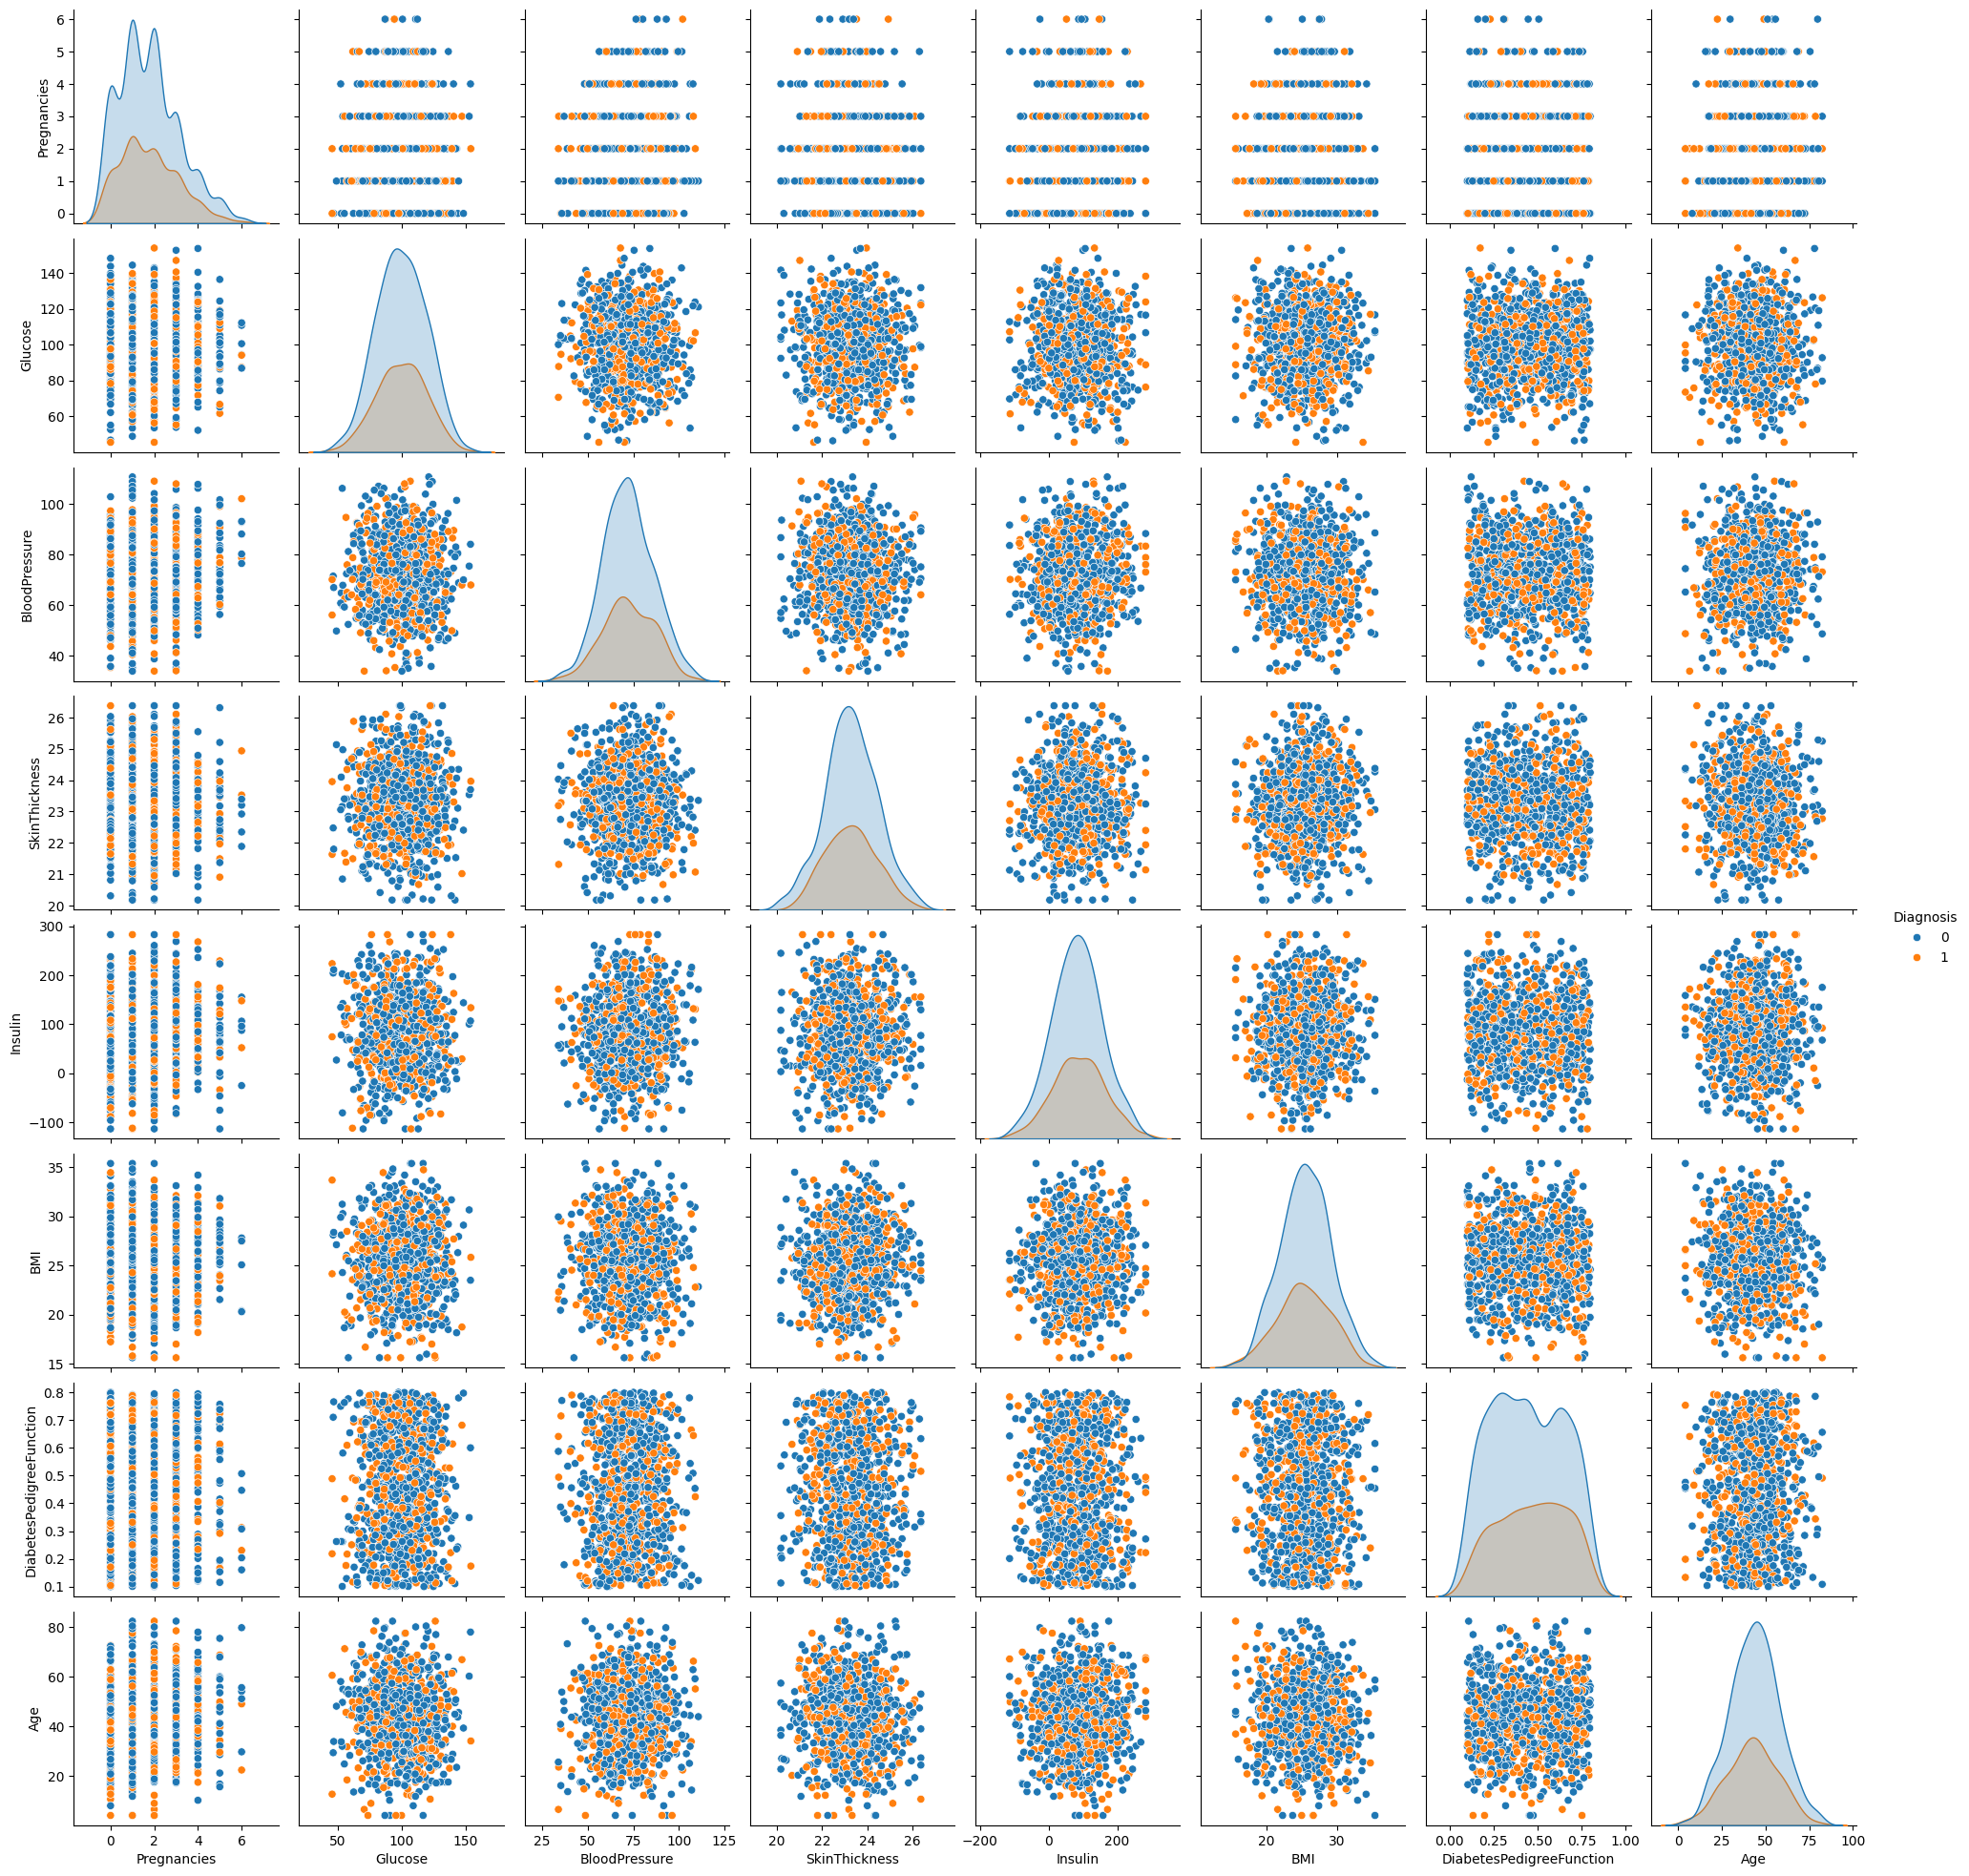

In [16]:
sns.pairplot(df, hue='Diagnosis')
plt.show()

**Visualisasi Distribusi Fitur Berdasarkan Diagnosis Menggunakan Boxplot**

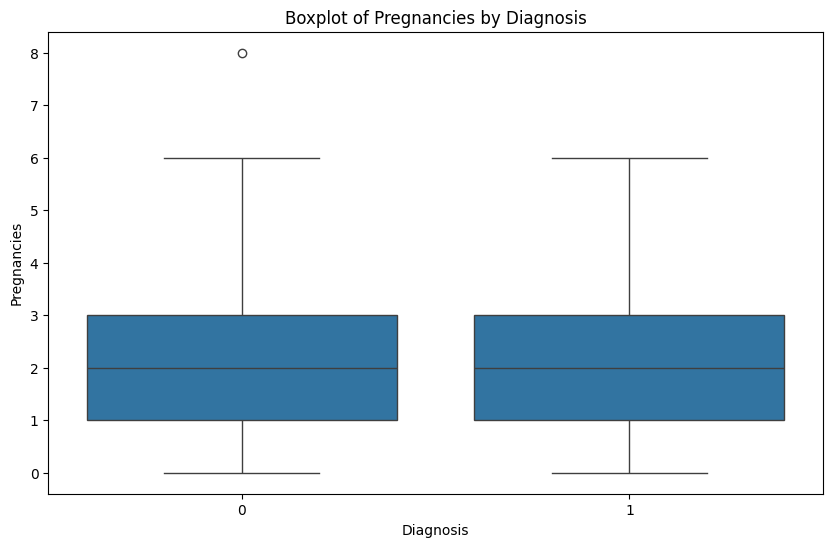

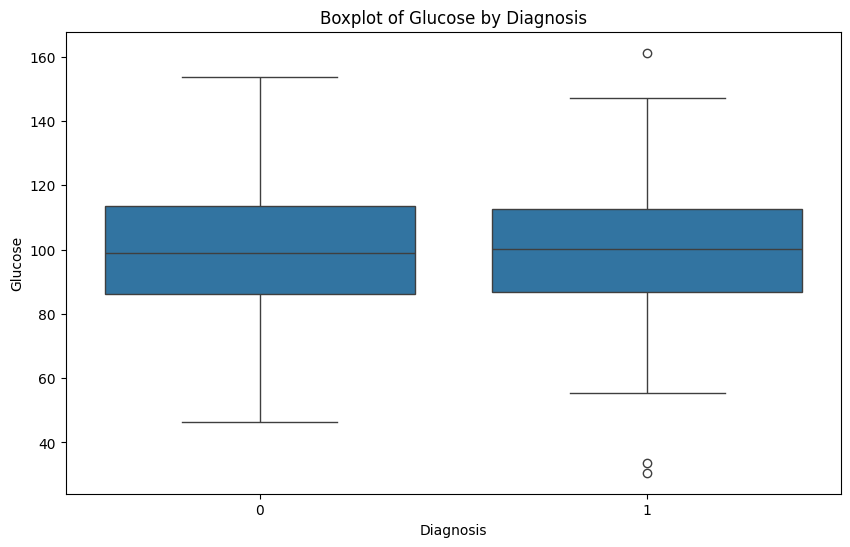

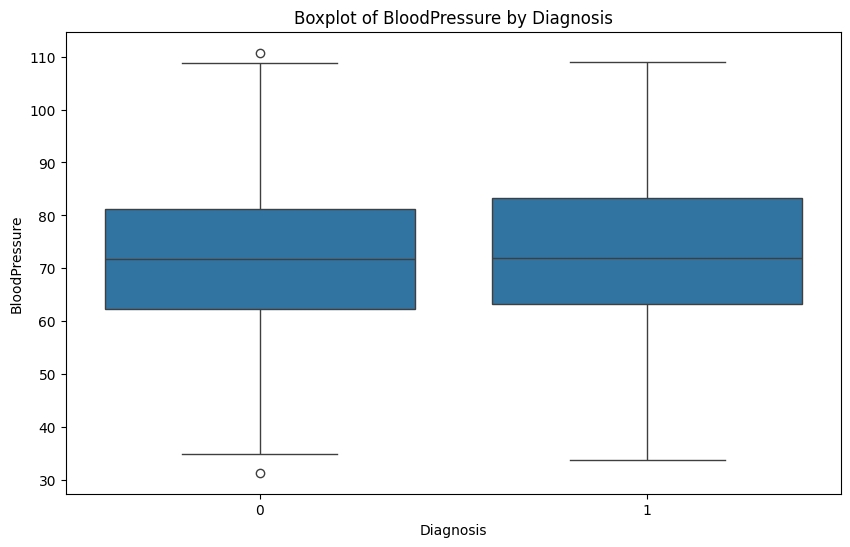

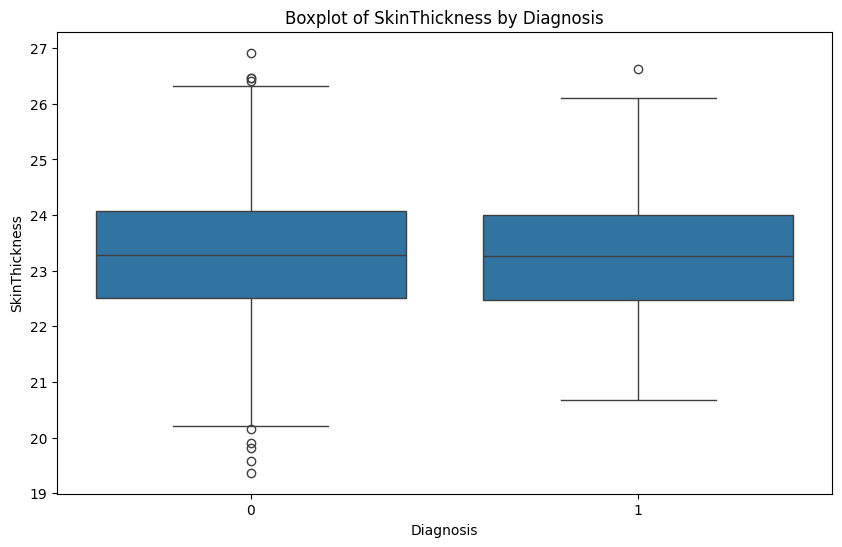

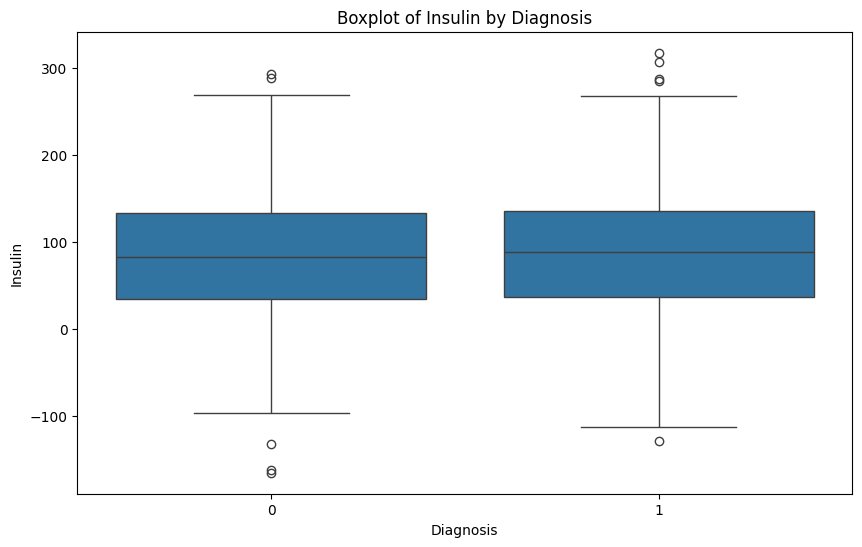

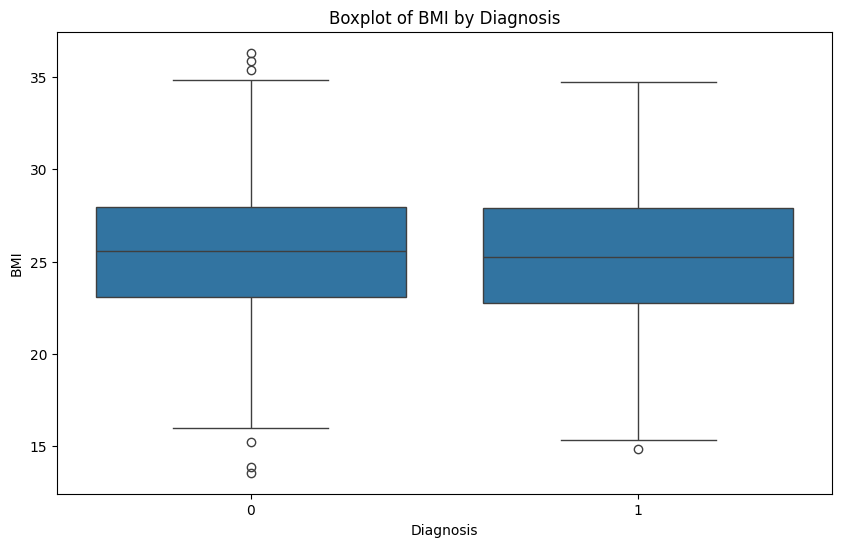

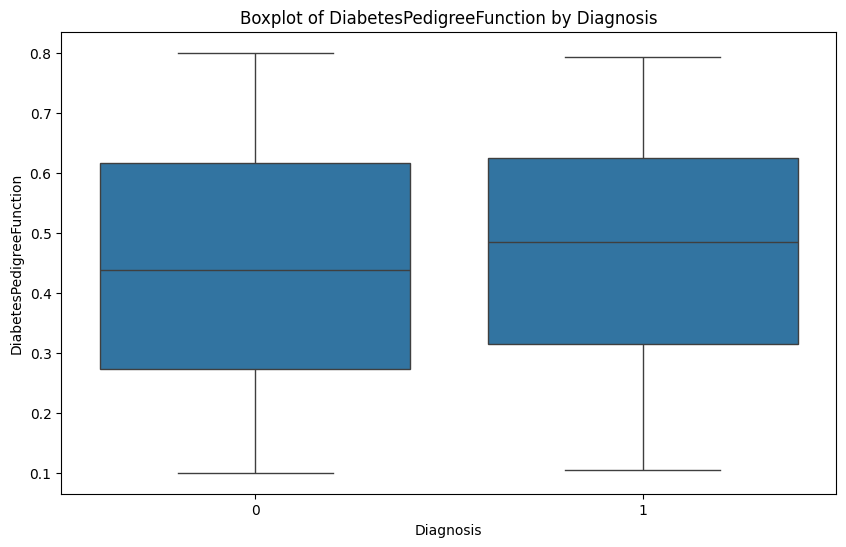

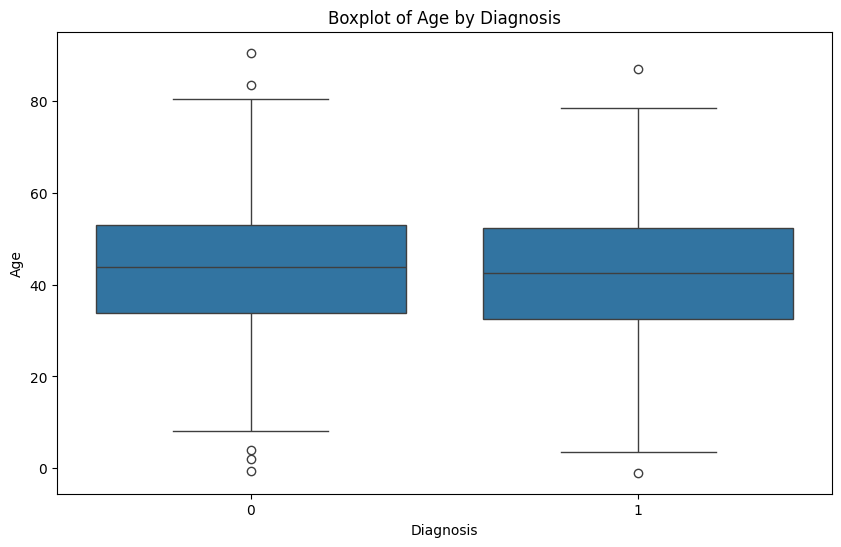

In [10]:
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diagnosis', y=column, data=df)
    plt.title(f'Boxplot of {column} by Diagnosis')
    plt.show()

**Insight:**

- Boxplot digunakan untuk memvisualisasikan distribusi data fitur numerik berdasarkan kelas target Diagnosis.
- Melalui visualisasi ini, kita dapat mengidentifikasi adanya outlier atau perbedaan distribusi antar kelas (Diabetes vs. Tidak Diabetes) pada setiap fitur.

# **Data Preparation**

### **Data Cleaning**

Pada tahap ini, Membersihkan data dari masalah yang teridentifikasi pada tahap sebelumnya yaitu Outlier. Mengatasi outlier menggunakan metode IQR

### **Mengatasi Outlier**

Outlier pada fitur-fitur data diatasi menggunakan metode IQR untuk meningkatkan akurasi model.

In [11]:
outliers = {}
for col in df.columns:
    if df[col].dtype != 'object':  # Hanya untuk kolom numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outlier_count
print('Jumlah Outlier pada setiap kolom:')
print(outliers)

Jumlah Outlier pada setiap kolom:
{'Pregnancies': 1, 'Glucose': 3, 'BloodPressure': 1, 'SkinThickness': 10, 'Insulin': 10, 'BMI': 9, 'DiabetesPedigreeFunction': 0, 'Age': 9, 'Diagnosis': 0}


In [12]:
# Mengatasi Outlier pada Semua Kolom
# Menggunakan metode Z-Score
for col in df.columns:
    if df[col].dtype != 'object':  # Hanya untuk kolom numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)
        kondisi_lower_than = df[col] < minimum
        kondisi_more_than = df[col] > maximum
        df[col] = df[col].mask(kondisi_more_than, maximum)
        df[col] = df[col].mask(kondisi_lower_than, minimum)
print('Selesai')

Selesai


In [13]:
outliers = {}
for col in df.columns:
    if df[col].dtype != 'object':  # Hanya untuk kolom numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outlier_count
print('Jumlah Outlier pada setiap kolom:')
print(outliers)

Jumlah Outlier pada setiap kolom:
{'Pregnancies': 0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0, 'DiabetesPedigreeFunction': 0, 'Age': 0, 'Diagnosis': 0}


### **Penanganan Data Tidak Seimbang Menggunakan SMOTE**

**Melihat Distribusi Kelas Sebelum Resampling**


Class Distribution Before SMOTE:
Diagnosis
0    694
1    306
Name: count, dtype: int64


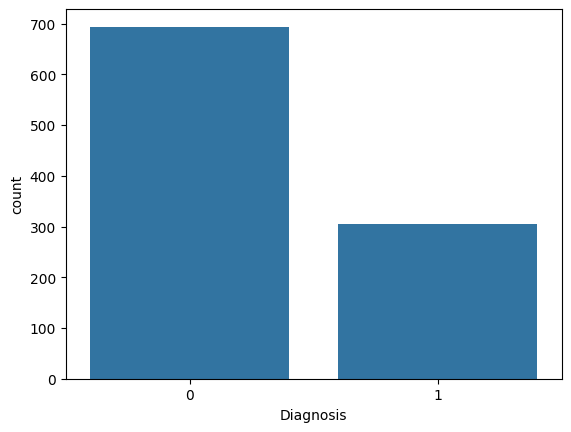

In [18]:
print("\nClass Distribution Before SMOTE:")
print(df['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df)
plt.show()

**Insight:**
-  Terdapat ketidakseimbangan pada distribusi kelas Diagnosis, yang dapat mempengaruhi kinerja model klasifikasi.

### **Menangani Ketidakseimbangan Data dengan SMOTE**

SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk membuat data sintetis pada kelas minoritas, sehingga distribusi kelas menjadi seimbang.

**Memisahkan Fitur dan Target**

In [19]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [20]:
# Menggunakan SMOTE untuk Oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

**Melihat Distribusi Kelas Setelah SMOTE**


Class Distribution After SMOTE:
[694 694]


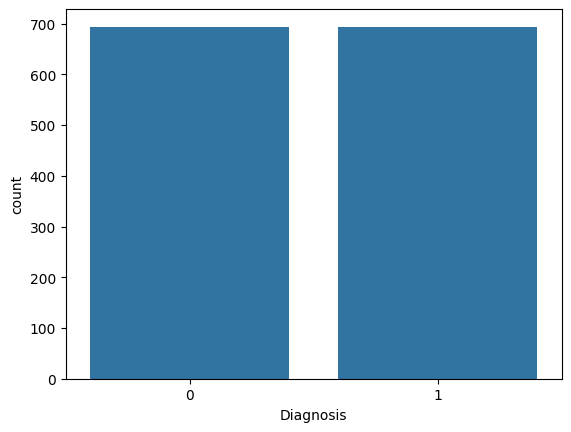

In [21]:
print("\nClass Distribution After SMOTE:")
print(np.bincount(y_resampled))
sns.countplot(x=y_resampled)
plt.show()

**Insight:**
-  Setelah dilakukan resampling dengan SMOTE, distribusi kelas menjadi seimbang.
-  Hal ini diharapkan dapat meningkatkan performa model klasifikasi, terutama pada kelas yang sebelumnya minoritas.
- Dengan data yang seimbang, model dapat belajar dengan lebih baik dan mengurangi bias terhadap kelas mayoritas

In [22]:
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Diagnosis'] = y_resampled
resampled_df

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0               2  115.863387      56.410731      24.336736   94.385783   
1               2   92.490122      70.615520      23.443591  138.652426   
2               1   88.141469      63.262618      23.404364  149.358082   
3               2  108.453101      67.793632      20.751580  108.751638   
4               1  127.849443      94.725685      22.603078   25.269987   
...           ...         ...            ...            ...         ...   
1383            1   91.730980      66.962750      22.703829  154.767891   
1384            2   89.075831      62.089842      22.713640    0.953340   
1385            0   82.048250      63.684430      23.637479  117.823066   
1386            1  103.864965      55.970823      23.407463   62.852983   
1387            1   78.753506      62.157041      22.719161    8.158877   

            BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0     26.455940                  0.272682  20.100494          0  
1     23.910167                  0.665160  44.912281          0  
2     21.948250                  0.676022  48.247873          1  
3     24.209304                  0.289636  42.749868          0  
4     32.997477                  0.601315  32.797789          0  
...         ...                       ...        ...        ...  
1383  29.000765                  0.402026  55.492764          1  
1384  22.863845                  0.752259  36.983795          1  
1385  28.902074                  0.203265  34.867513          1  
1386  24.285393                  0.518722  60.771625          1  
1387  25.191053                  0.763788  37.178463          1  

[1388 rows x 9 columns]

### **Data Splitting**

Dataset dibagi menjadi data latih (80%) dan data uji (20%) untuk menguji performa model

In [23]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### **Feature Scaling**

Menggunakan StandardScaler digunakan untuk menormalkan fitur numerik agar memiliki mean 0 dan standar deviasi 1

In [24]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Modeling**

Pada tahap ini, dilakukan pemodelan menggunakan empat algoritma boosting yang populer: XGBoost, LightGBM, CatBoost, dan Gradient Boosting. Keempat model ini diuji dan dievaluasi menggunakan metrik akurasi, precision, recall, dan F1-score untuk menilai performa dalam memprediksi risiko diabetes.

## **XGBoost**

XGBoost (Extreme Gradient Boosting) adalah algoritma boosting berbasis pohon keputusan yang membangun model secara bertahap. Setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya. XGBoost cenderung memiliki performa yang sangat baik, terutama pada dataset yang kompleks.


In [25]:
# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [26]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print('XGBoost Accuracy:', xgb_accuracy)

XGBoost Accuracy: 0.6762589928057554


### **Evaluasi Model XGBoost**

**Classification Report XGBoost**

In [27]:
# Classification Report for XGBoost
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       139
           1       0.66      0.72      0.69       139

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278



**Insight:**

 XGBoost memberikan akurasi 67.6%, dengan precision yang lebih baik untuk kelas 0 dan recall lebih tinggi untuk kelas 1. Ini menunjukkan model cukup baik dalam menangani risiko diabetes, namun ada ruang untuk perbaikan.

**Confusion Matrix XGBoost**

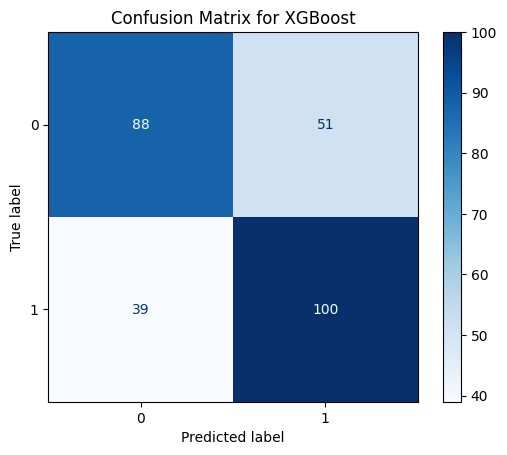

In [28]:
# Confusion Matrix for XGBoost
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

## **LightGBM**

LightGBM adalah implementasi dari gradient boosting yang dikembangkan oleh Microsoft dan lebih cepat dalam memproses data besar.

In [29]:
# LightGBM Model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 555, number of negative: 555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(random_state=42)

In [30]:
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print('LightGBM Accuracy:', lgbm_accuracy)

LightGBM Accuracy: 0.6834532374100719


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### **Evaluasi Model LightGBM**

**Classification Report LightGBM**

In [31]:
# Classification Report for LightGBM
print("\nClassification Report for LightGBM:")
print(classification_report(y_test, y_pred_lgbm))


Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       139
           1       0.67      0.72      0.69       139

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278



**Insight: **

LightGBM sedikit lebih unggul dibandingkan XGBoost dengan akurasi 68.3%. Precision dan recall hampir seimbang untuk kedua kelas, menunjukkan bahwa model dapat memprediksi dengan cukup baik tanpa terlalu banyak bias terhadap kelas tertentu.

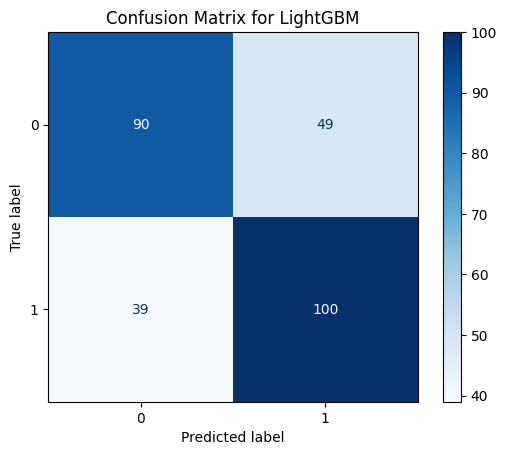

In [32]:
# Confusion Matrix for LightGBM
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm, cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.show()

## **CatBoost**

CatBoost adalah algoritma boosting lain yang dirancang untuk menangani data kategorikal tanpa perlu encoding khusus.

In [33]:
catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 to suppress logs
catboost_model.fit(X_train, y_train)

In [34]:
y_pred_catboost = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
print("\nCatBoost Accuracy:", catboost_accuracy)


CatBoost Accuracy: 0.6726618705035972


### **Evaluasi Model CatBoost**

**Classification Report CatBoost**

In [35]:
print("Classification Report for CatBoost:")
print(classification_report(y_test, y_pred_catboost))

Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64       139
           1       0.65      0.76      0.70       139

    accuracy                           0.67       278
   macro avg       0.68      0.67      0.67       278
weighted avg       0.68      0.67      0.67       278



**Insight:**

CatBoost menunjukkan performa yang sedikit lebih rendah dibandingkan dengan LightGBM dan XGBoost. Meskipun memiliki precision yang lebih tinggi untuk kelas 0, recall untuk kelas 1 lebih rendah, yang menunjukkan model ini kurang sensitif terhadap risiko diabetes.

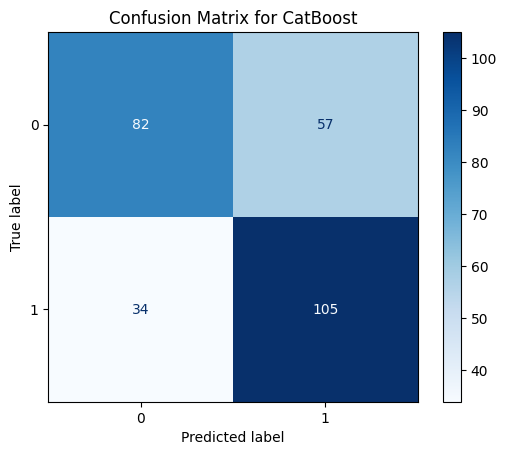

In [36]:
# Confusion Matrix for CatBoost
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_catboost, cmap='Blues')
plt.title('Confusion Matrix for CatBoost')
plt.show()

# **Hyperparameter Tuning**

Melalui Hyperparameter Tuning, kita dapat meningkatkan performa model dengan memilih kombinasi parameter terbaik metode yang digunakan adalah GridSearchCV, yang memungkinkan pencarian grid atau ruang parameter untuk menemukan kombinasi yang optimal dan meningkatkan akurasi serta performa model secara keseluruhan.

**XGBoost dengan GridSearchCV**

Parameter yang digunakan pada XGBoost meliputi:

In [41]:
# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [42]:
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [43]:
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)

In [44]:
print("\nBest Parameters for XGBoost:", grid_search.best_params_)
print("Best XGBoost Accuracy:", best_xgb_accuracy)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best XGBoost Accuracy: 0.6546762589928058


Setelah hyperparameter tuning, parameter terbaik untuk XGBoost adalah learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200


**Evaluasi Model XGBoost dengan GridSearchCV**

Classification Report XGBoost with GridSeachCV

In [45]:
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(y_test, y_pred_best_xgb))


Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       139
           1       0.64      0.69      0.67       139

    accuracy                           0.65       278
   macro avg       0.66      0.65      0.65       278
weighted avg       0.66      0.65      0.65       278



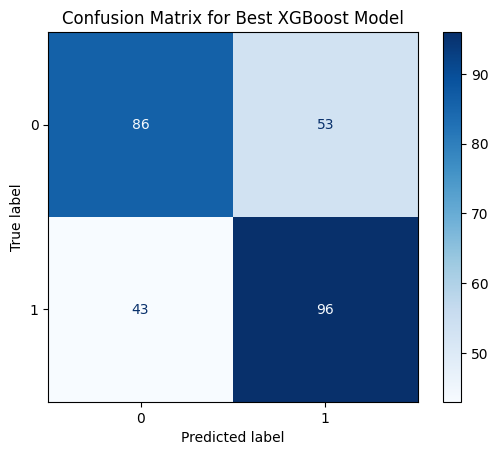

In [46]:
# Confusion Matrix for Best XGBoost Model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_xgb, cmap='Blues')
plt.title('Confusion Matrix for Best XGBoost Model')
plt.show()

**LightGBM dengan GridSearchCV**

In [47]:
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 10],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [48]:
lgbm_grid_search = GridSearchCV(estimator=lgbm_model,param_grid=lgbm_param_grid,cv=3,scoring='accuracy',n_jobs=-1,verbose=2)

In [49]:
lgbm_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 555, number of negative: 555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 1110, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 50, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [50]:
best_lgbm_model = lgbm_grid_search.best_estimator_
y_pred_best_lgbm = best_lgbm_model.predict(X_test)
best_lgbm_accuracy = accuracy_score(y_test, y_pred_best_lgbm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [51]:
print("\nBest Parameters for LightGBM:", lgbm_grid_search.best_params_)
print("Best LightGBM Accuracy:", best_lgbm_accuracy)


Best Parameters for LightGBM: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 50, 'subsample': 0.8}
Best LightGBM Accuracy: 0.6942446043165468


**Evaluasi Model LightGBM dengan GridSearchCV**

Classification Report LightGBM with GridSeachCV

In [52]:
print("\nClassification Report for Best LightGBM Model:")
print(classification_report(y_test, y_pred_best_lgbm))


Classification Report for Best LightGBM Model:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       139
           1       0.67      0.76      0.71       139

    accuracy                           0.69       278
   macro avg       0.70      0.69      0.69       278
weighted avg       0.70      0.69      0.69       278



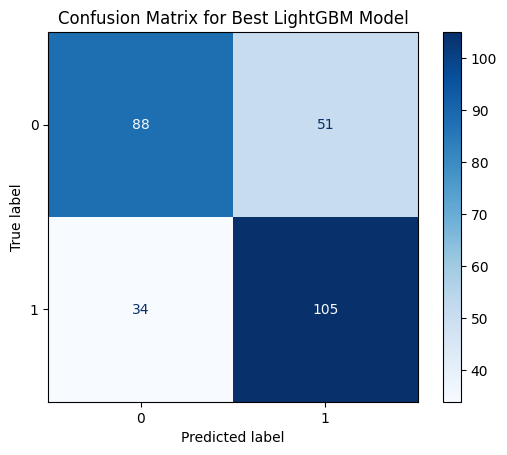

In [53]:
# Confusion Matrix for Best LightGBM Model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_lgbm, cmap='Blues')
plt.title('Confusion Matrix for Best LightGBM Model')
plt.show()

**CatBoost with GridSearchCV**

In [54]:
# CatBoost with GridSearchCV
catboost_param_grid = {
    'iterations': [300, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

In [55]:
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
catboost_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7e68997cee90>,
             n_jobs=-1,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [300, 500, 1000],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy', verbose=2)

In [56]:
best_catboost_model = catboost_grid_search.best_estimator_
y_pred_best_catboost = best_catboost_model.predict(X_test)
best_catboost_accuracy = accuracy_score(y_test, y_pred_best_catboost)

In [57]:
print("\nBest Parameters for CatBoost:", catboost_grid_search.best_params_)
print("Best CatBoost Accuracy:", best_catboost_accuracy)


Best Parameters for CatBoost: {'border_count': 32, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best CatBoost Accuracy: 0.7158273381294964


**Evaluasi Model CatBoost with GridSeachCV**

Classification Report CatBoost with GridSeachCV

In [58]:
print("\nClassification Report for Best CatBoost Model:")
print(classification_report(y_test, y_pred_best_catboost))


Classification Report for Best CatBoost Model:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       139
           1       0.69      0.77      0.73       139

    accuracy                           0.72       278
   macro avg       0.72      0.72      0.71       278
weighted avg       0.72      0.72      0.71       278



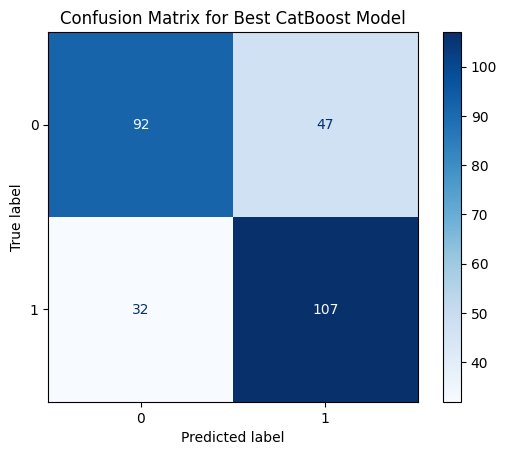

In [59]:
# Confusion Matrix for Best CatBoost Model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_catboost, cmap='Blues')
plt.title('Confusion Matrix for Best CatBoost Model')
plt.show()

**Insight:**

 Hyperparameter tuning membantu meningkatkan performa model secara signifikan, dengan CatBoost mencapai akurasi terbaik di antara semua model.

## **Conclusion**

Berdasarkan hasil evaluasi, CatBoost dengan parameter terbaik setelah hyperparameter tuning memberikan performa terbaik dibandingkan model lainnya. Berikut adalah ringkasan temuan utama dari proyek ini:

**1. Perbandingan Model**

  - CatBoost : Memberikan akurasi tertinggi sebesar 71.6% , diikuti oleh LightGBM dengan akurasi 69.4% dan XGBoost dengan akurasi 65.5% .

**2. Performa Metrik Evaluasi**
  - Precision dan Recall :
    - CatBoost menunjukkan precision yang lebih tinggi untuk kelas 0 (0.74 ) dan recall yang baik untuk kelas 1 (0.77 ), menjadikannya model yang lebih sensitif terhadap risiko diabetes.
    - LightGBM dan XGBoost memiliki precision dan recall yang seimbang untuk kedua kelas, tetapi tidak seoptimal CatBoost.
  - F1-Score :
    - CatBoost mencapai F1-Score tertinggi untuk kedua kelas, yaitu 0.70 (kelas 0) dan 0.73 (kelas 1), yang menunjukkan keseimbangan antara precision dan recall.

**3. Penanganan Ketidakseimbangan Data**
  - Teknik SMOTE berhasil meningkatkan recall untuk kelas minoritas (kelas 1), yang membantu model mengenali lebih banyak kasus diabetes tanpa mengorbankan performa pada kelas mayoritas.
      
**4. Rekomendasi**
  - Model Terbaik : CatBoost adalah pilihan terbaik untuk prediksi risiko diabetes berdasarkan akurasi dan metrik evaluasi lainnya.
  - Hyperparameter Tuning : Langkah ini sangat penting untuk meningkatkan performa model. Parameter terbaik yang diperoleh melalui GridSearchCV secara signifikan meningkatkan akurasi model.

**5. Future Work :**
  - Penambahan Fitur : Menambahkan fitur tambahan seperti riwayat medis keluarga atau gaya hidup dapat meningkatkan akurasi model.
  - Teknik Optimasi Lanjutan : Menggunakan teknik optimasi lain seperti RandomizedSearchCV atau Bayesian Optimization untuk eksplorasi ruang parameter yang lebih luas.
  - Algoritma Alternatif : Menguji algoritma lain seperti Random Forest atau Neural Networks untuk memverifikasi apakah ada model yang lebih baik.